In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import math

pd.set_option('display.max_columns', None)
data = pd.read_csv('input.csv')

data.columns

Index(['時間戳記', '已繳費', '票的類型', '姓名', '電子郵件信箱', '學號', '系所', '身分證字號', '出生年月日',
       '是否搭車（需加150元）', '姓名 ', '電子郵件信箱.1', '學號 ', '系所 ', '身分證字號 ', '出生年月日 ',
       '是否搭車（需加150元）.1', '姓名.1', '電子郵件信箱.2', '學號 .1', '系所.1', '身分證字號 .1',
       '出生年月日.1', '是否搭車', '姓名.2', '電子郵件信箱.3', '學號.1', '系所.2', '身分證字號.1',
       '出生年月日.2', '是否搭車（需加150元）.2', 'Unnamed: 31'],
      dtype='object')

In [17]:
# iter through each row

attendees_list = []

for index, row in data.iterrows():
    # skip nan users
    if (pd.isnull(row['票的類型'])):
        # skip meanningless rows
        continue

    # print(row)
    if (row['票的類型'] == '一般票 $500'):
        # one attendee
        user = row.iloc[3:10].values.tolist()
        user.append('S')
        user.append(not pd.isnull(row['已繳費']))
        # S stands for Single
        attendees_list.append(user)
        # attendees = append_attendee(attendees, user)

    else:
        # three attendees
        user1 = row.iloc[10:17].values.tolist()
        user2 = row.iloc[17:24].values.tolist()
        user3 = row.iloc[24:31].values.tolist()

        user1.append('G')
        user2.append('G')
        user3.append('G')
        # G stands for Group
        user1.append(not pd.isnull(row['已繳費']))
        user2.append(not pd.isnull(row['已繳費']))
        user3.append(not pd.isnull(row['已繳費']))

        if(isinstance(user1[0], str)):
            attendees_list.append(user1)
        if(isinstance(user2[0], str)):
            attendees_list.append(user2)
        if(isinstance(user3[0], str)):
            attendees_list.append(user3)

# convert list into dataframe
attendees = pd.DataFrame(attendees_list, columns=[
                         'name', 'email', 'student_id', 'department', 'id', 'birthday', 'carry', 'type', 'paid'])

attendees = attendees[['department', 'student_id', 'name', 'email', 'id', 'birthday', 'carry', 'type', 'paid']].rename(columns={
    "name": "姓名",
    "email": "電子郵件",
    "id": "身分證字號",
    "student_id": "學號",
    "birthday": "生日",
    "department": "系所",
    "carry": "搭車",
    'type': "票種",
    'paid': '已繳費'
})

# Post processing data

# 0. remove decimal point
attendees['學號'] = attendees['學號'].astype(str).str.replace('.0', '')

# 1. 身分證字號轉大寫
attendees['身分證字號'] = attendees['身分證字號'].str.upper()
# 2. 轉西元年轉民國年

for i in range(1988, 2010):
    attendees['生日'] = attendees['生日'].str.replace(str(i), str(i-1911))

attendees['生日'] = attendees['生日'].str.replace('/', '-')

# attendees['生日'] = attendees['生日'].map(
#     lambda x: dt.datetime(x.year-1911, x.month, x.day).strftime('%Y-%m-%d %S:%M:%H'))

# print(attendees.head())

# 3. 轉換科系名稱
attendees['系所'] = attendees['系所'].str.replace('系', '')
attendees['系所'] = attendees['系所'].str.replace('生命科學', '清大生科')
attendees['系所'] = attendees['系所'].str.replace('人文社會學', '人社')
attendees['系所'] = attendees['系所'].str.replace('電子物理', '電物')
attendees['系所'] = attendees['系所'].str.replace('醫科（生醫院', '清大醫科')
attendees['系所'] = attendees['系所'].str.replace('116', '')
attendees['系所'] = attendees['系所'].str.replace('16', '')
attendees['系所'] = attendees['系所'].str.replace('15', '')
attendees['系所'] = attendees['系所'].str.replace('14', '')
attendees['系所'] = attendees['系所'].str.replace('27', '')
attendees['系所'] = attendees['系所'].str.replace('26', '')
attendees['系所'] = attendees['系所'].str.replace('大二', '')
attendees['系所'] = attendees['系所'].str.replace('二', '')
attendees['系所'] = attendees['系所'].str.replace('醫學科學', '清大醫科')
attendees['系所'] = attendees['系所'].str.replace('應用化學', '應化')
attendees['系所'] = attendees['系所'].str.replace('機械工程學', '機械')
attendees['系所'] = attendees['系所'].str.replace('國立陽明交通大學機械工程學', '機械')
attendees['系所'] = attendees['系所'].str.replace('材料科學與工程學', '材料')
attendees['系所'] = attendees['系所'].str.replace('清大生科院生科', '清大生科')
attendees['系所'] = attendees['系所'].str.replace('國立陽明交通大學機械', '機械')
attendees['系所'] = attendees['系所'].str.replace('硬化', '應化')
attendees['系所'] = attendees['系所'].str.replace('資訊工程學', '資工')
attendees['系所'] = attendees['系所'].str.replace('交大應用數學', '應數')
attendees['系所'] = attendees['系所'].str.replace('清大 清大醫科', '清大醫科')
attendees['系所'] = attendees['系所'].str.replace('材清', '清大材料')
attendees['系所'] = attendees['系所'].str.replace('機械雙主', '機械')
attendees['系所'] = attendees['系所'].str.replace('機械係', '機械')
attendees['系所'] = attendees['系所'].str.replace('電物學', '電物')
attendees['系所'] = attendees['系所'].str.replace('交大資工', '資工')
attendees['系所'] = attendees['系所'].str.replace('機械工程', '機械')
attendees['系所'] = attendees['系所'].str.replace('清大生醫院學士班', '清大生醫院')
attendees['系所'] = attendees['系所'].str.replace('生醫院學士班', '清大生醫院')
attendees['系所'] = attendees['系所'].str.replace('清大教育學院學士班', '清大教育院')
attendees['系所'] = attendees['系所'].str.replace('生物科技', '生技')
attendees.loc[attendees["系所"] == "醫科", "系所"] = '清大醫科'
attendees.loc[attendees["系所"] == "生科", "系所"] = '清大生科'

# print(sorted(attendees['系所'].unique()))
print(attendees['系所'].unique())

# 匯出資料
# attendees['生日'] = attendees['生日'].dt.strftime('%Y-%m-%d %S:%M:%H')
attendees.to_csv('output.csv', index=False, encoding='utf_8_sig')

# cars

cars = attendees[attendees['搭車'] == '是']
cars = cars[['系所', '學號', '姓名', '電子郵件', '已繳費']]
cars.to_csv('cars.csv', index=False, encoding='utf_8_sig')

['清大學科所' '清大醫科' '人社' '資工' '清大教育院' '清大生醫院' '機械' '電物' '清大生科' '電機' '應化'
 '清大動機' '清大學科' '材料' '電機工程學' '資財' '運管' '外文' '工工' '機械所' '傳科' '應數' '清大經濟'
 '交大應化' '化學' '土木' '清大 生醫院 分生所' '電子與光子學士後' '牙醫' '水環' '資管碩' '清大材料' '生技'
 '應藝所' '科技法律研究所' '電子' '陽光國中 國貿' '資工所']


總人數:  349
搭車人數 171
已繳費金額: 163300
全部應收金額: 187600


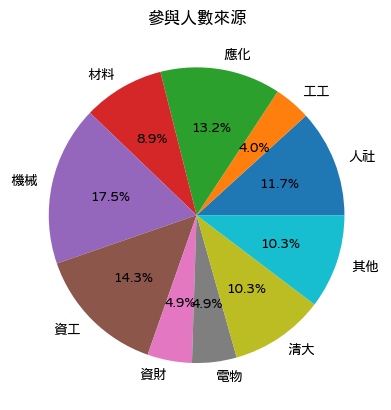

其他    department number
0        交大應化    2.0
2          傳科    1.0
3          化學    1.0
4          土木    1.0
5          外文    3.0
8          應數    2.0
9         應藝所    1.0
12        機械所    1.0
13         水環    1.0
24         牙醫    1.0
25         生技    1.0
26    科技法律研究所    1.0
28        資工所    1.0
29        資管碩    2.0
31         運管    3.0
32    陽光國中 國貿    1.0
33         電子    1.0
34   電子與光子學士後    1.0
35         電機   10.0
36      電機工程學    1.0


/tmp/ipykernel_503181/2493188057.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others['number'] = others['number'] * total/100


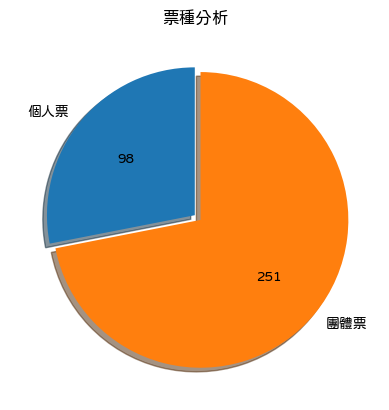

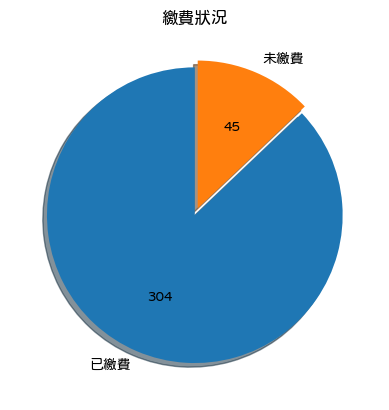

In [18]:
# 統計資料
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='jf-openhuninn-2.0')

""" 1. 總人數 """

print('總人數: ', attendees.shape[0])
print('搭車人數', attendees[attendees['搭車'] == '是'].shape[0])

cash = 0
paid = attendees[attendees['已繳費'] == True]
cash += paid[paid['票種'] == 'S'].shape[0]*500
cash += paid[paid['票種'] == 'G'].shape[0]*450
cash += cars[cars['已繳費'] == True].shape[0]*150
print('已繳費金額:', cash)

print('全部應收金額:', attendees[attendees['票種'] == 'S'].shape[0]*500
      + attendees[attendees['票種'] == 'G'].shape[0]*450
      + cars.shape[0]*150)

""" 2. 系所分析 """

# print('總系所: ', attendees['系所'].unique().shape[0])

tag, cnt = np.unique(attendees['系所'], return_counts=True)
department = pd.DataFrame({'department': tag, 'number': cnt})
total = cnt.sum()
department['number'] = department['number'] / total * 100

# put nthu as a category
nthu = department['department'].str.contains('清大')
nthu_cnt = department[nthu]['number'].sum()
# department.loc[department["department"] == "清大", "department"] = '其他'

department_without_nthu = department[~nthu]

department = pd.concat([department_without_nthu, pd.DataFrame(
    ['清大', nthu_cnt], index=['department', 'number']).T])

# move tags less than 3% to others
selected = department[department['number'] >= 3]
others = department[department['number'] < 3]

tags = selected['department'].tolist()
tags.append('其他')
cnt = selected['number'].tolist()
cnt.append(others['number'].sum())
plt.title('參與人數來源')
plt.pie(cnt, labels=tags, autopct='%1.1f%%')
plt.show()

others['number'] = others['number'] * total/100
print('其他', others)

# 3. 個票種人數
labels = ['個人票', '團體票']
sizes = np.array([attendees['票種'].value_counts()['S'],
                 attendees['票種'].value_counts()['G']])
total = sizes.sum()
explode = (0, 0.05)
plt.title('票種分析')
plt.pie(sizes,
        explode=explode,
        labels=labels,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True,
        startangle=90
        )
plt.show()
# 4. 已繳費
labels = ['已繳費', '未繳費']
sizes = np.array([attendees['已繳費'].value_counts()[True],
                 attendees['已繳費'].value_counts()[False]])
total = sizes.sum()
explode = (0, 0.05)
plt.title('繳費狀況')
plt.pie(sizes,
        explode=explode,
        labels=labels,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
        shadow=True,
        startangle=90
        )
plt.show()